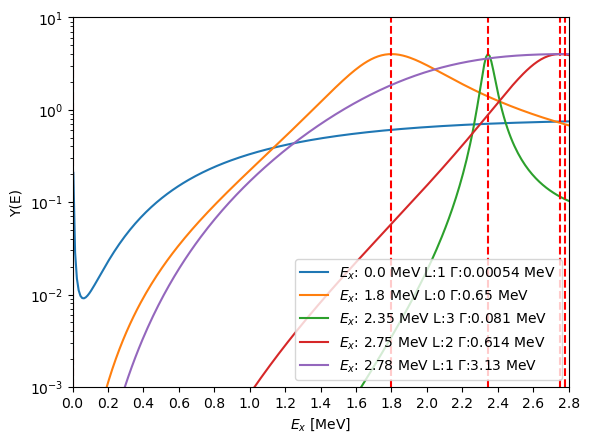

In [10]:
# Reference: https://www.osti.gov/servlets/purl/1281675
# https://www.nndc.bnl.gov/nudat3/getdataset.jsp?nucleus=9B&unc=NDS
# https://pure-oai.bham.ac.uk/ws/files/27169423/prc_wheldon_spectroscopy_of_b9_via_high_resolution_ejectile_tagged_recoil_breakup_2015.pdf

from mpmath import *
import numpy as np
import matplotlib.pyplot as plt

def F(l, eta, z):
    out = []
    try: #numpy array
        for n in range(len(eta)):
            out.append(coulombf(l,eta[n],z[n]))
        return np.array(out)
    except: #Single val
        return coulombf(l,eta,z)
def G(l, eta, z):
    out = []
    try:
        for n in range(len(eta)):
            out.append(coulombg(l,eta[n],z[n]))
        return np.array(out)
    except: #Single val
        return coulombg(l,eta,z)

def Pl(l, eta, z):
    return z/(F(l,eta,z)**2+G(l,eta,z)**2) #Penetrability = ka/(F^2+G^2)

#Constants
hbar = 197 #MeV/fm
e2 = 1.6e-19**2
amu = 931.5 #MeV/c2
alpha = 1./137.

#Inputs
M1 = 8 #in amu
M2 = 1 #in amu
a = 1.4*(M1**(1/3)+M2**(1/3)) #fm
Z1 = 4 #in units of e
Z2 = 1 #in units of e
mu = (M1*M2)/(M1+M2)
E = np.linspace(0.1,3.1,301) #MeV

#State

Q = 0.1859
l = [1,0,3,2,1] #3/2- g.s, 1/2+, sharp alpha 5/2-, 5/2+, broad 1/2-
Ex = [0,1.8,2.345,2.75,2.78] #MeV, Ex
Gamma = [0.54e-3,0.650,0.081,0.614,3.13] #MeV
I = [10,1,1,1,1] #Intensities
Ex=np.array(Ex)+Q
#

for n in range(len(Ex)):
    k = np.sqrt((2*mu*amu*E))/hbar #fm^-1
    eta = alpha*Z1*Z2*np.sqrt((mu*amu)/(2*E))
    z = k*a

    k_res = np.sqrt((2*mu*amu*Ex[n]))/hbar #fm^-1
    eta_res = alpha*Z1*Z2*np.sqrt((mu*amu)/(2*Ex[n]))
    z_res = k_res*a

    g2 = Gamma[n]/(2*Pl(l[n],eta_res,z_res)) #reduced width at pole (ignoring shifts for now)
    width = 2*Pl(l[n],eta,z)*g2#Gamma=2*Pl(E)*g2

    lineshape = I[n]*width**2/((E-Ex[n])**2+width**2*0.25)
    plt.plot(E-Q,lineshape,label=f"$E_x$: {Ex[n]-Q:.3} MeV L:{l[n]} $\Gamma$:{Gamma[n]:.3} MeV")
    #plt.yscale('log')
    
    plt.xlabel("$E_{x}$ [MeV]")
    plt.ylabel("Y(E)")
    plt.axvline(x=Ex[n]-Q,c="red",ls="--")
plt.xticks(np.arange(0.0,3,step=0.2))
plt.xlim(0.0,2.8)
plt.ylim(1e-3,10)
plt.yscale('log')
plt.legend()
plt.show()